In [1]:
from pyiron_base import Project
import numpy as np
import pyiron_continuum

2024-05-02 17:29:59,394 - pyiron_log - WARNING - pyiron found a 'templates' folder in the /home/tlakshmi/pyiron/resources resource directory. These are no longer supported in pyiron_base >=0.7.0. They are replaced by Project.create_job_class() and Project.wrap_python_function().


In [2]:
pr = Project('cantilever_fenicsx')
pr.remove_jobs(silently=True)

0it [00:00, ?it/s]

In [3]:
job = pr.create.job.Fenicsx('LE_cantilever')

In [4]:
W = 0.2
L = 1
mu = 1
rho = 1
delta = W / L
gamma = 0.4 * delta**2
beta = 1.25
lambda_ = beta
g = gamma

In [5]:
job.geom = job.create.geom.box(0, 0, 0, L, W, W)
dimensions = 3
min_mesh_length = 0.03
max_mesh_length = 0.03
job.domain = job.create.domain.standardDomain(job.geom, dimensions, min_mesh_length, max_mesh_length)
job.mesh = job.create.get_mesh(job.domain)

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 50%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.000595967s, CPU 0.00104s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [ 40%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [ 50%] Meshing surface 4 (Plane, Frontal-Delaunay)
Info    : [ 70%] Meshing surface 5 (Plane, Frontal-Delaunay)
Info    : [ 90%] Meshing surface 6 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0229749s,

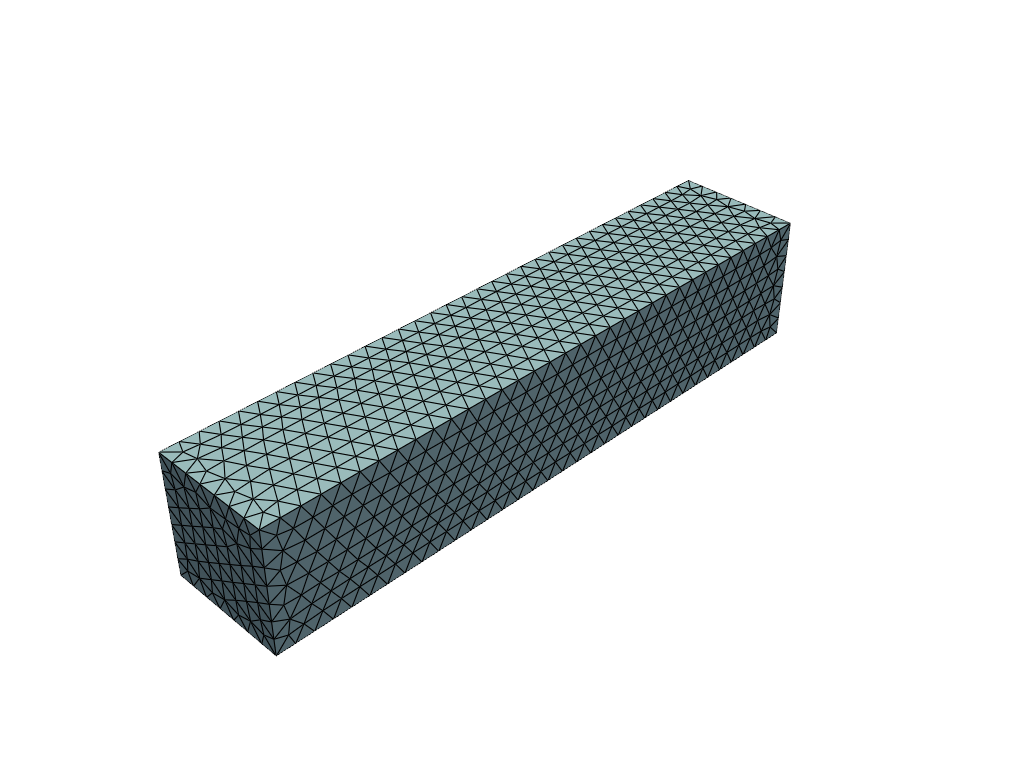

In [6]:
job.V = job.create.V.vectorfunctionspace(job.mesh, "Lagrange", 1)
job.plot.plot_mesh(job.V)

In [7]:
def clamped_boundary(x):
    return np.isclose(x[0], 0)

bc1 = job.make_dirichletBC_vectorfunctionspace_3D(job.V, clamped_boundary, 0, 0, 0)
job.appendBC(bc1)

In [8]:
job.set_lambda(lambda_)
job.set_mu(mu)
job.set_bodyforce(job.Constant_vector_3D(job.mesh, 0, 0, -rho * g))
job.set_traction(job.Constant_vector_3D(job.mesh, 0, 0, 0))
#job.lambda_, job.mu, job.f, job.T

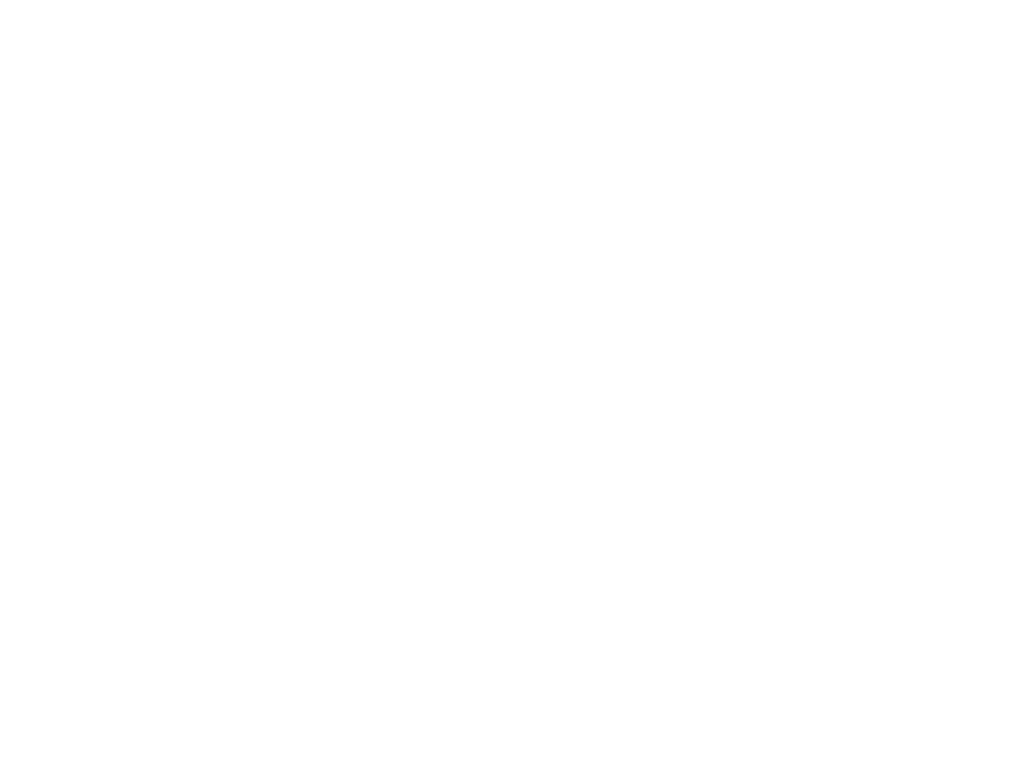

In [10]:
job.solveLinearElastic()
job.plot.plot_deformed_vectorfunctionspace(job.V, job.uh, 1)

In [11]:
job.uh.x.array

Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, equispaced, unset, False, float64, []), (3,)), 0), blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False, float64, []), (3,))), 1)